# Sensitivity Analysis for Energy Based Model of EGFR Pathway

In [2]:
# SBML model we want to import
sbml_file = 'Step5.xml'
# Name of the model that will also be the name of the python module
model_name = 'Step5_SA'
# Directory to which the generated model code is written
model_output_dir = model_name

import libsbml
import importlib
import amici
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

## Importing the SBML model, compiling and generating an AMICI module

In [3]:
# Create an SbmlImporter instance for our SBML model
sbml_importer = amici.SbmlImporter(sbml_file)

### Constant parameters

Constant parameters, i.e. parameters with respect to which no sensitivities are to be computed. Here, we are going to make sensitivity analysis for cooperative free energy parameters. So other parameters are considered as constant parameters.

In [4]:
constantParameters = ['r3_k3f', 'r3_k3b', 'r4_V4', 'r4_K4', 'r6_k6f', 'r6_k6b', 'r7_k7f', 'r7_k7b', 'r8_V8', 'r8_K8',
                     'r14_k14f', 'r14_k14b', 'r15_k15f', 'r15_k15b', 'r16_V16', 'r16_K16', 'r25_k25f','r25_k25b',
                     'Gf_LR', 'Gf_RR', 'Gf_RSh', 'Gf_RG', 'Gf_GS', 'Gf_RPL', 'phi', 'Ea_RR', 'Ea_LR',
                     'Ea_RSh', 'Ea_RG', 'Ea_GS', 'Ea_ShG', 'Ea_RPL', 'Gf_ShG'
]

### Observables

Here we define phosphorylated EGFR as the observable, becasue we are going to determine the effects of cooperative parameters on its behavior.


In [5]:
# Define observables
observables = {
    'observable_EGFRPtotal1':{'name': '', 'formula': 'EGFRPtotal'},
    #'observable_PLCgPtotal1' :{'name': '', 'formula': 'PLCgPtotal'},
    #'observable_ShPtotal1':{'name': '', 'formula': 'ShPtotal'},
    #'observable_Grb2Shctotal1':{'name': '', 'formula': 'Grb2Shctotal'},
    #'observable_Grb2EGFRtotal1':{'name': '', 'formula': 'Grb2EGFRtotal'}
}


### Generating the module

Now we can generate the python module for our model. `amici.SbmlImporter.sbml2amici` will symbolically derive the sensitivity equations, generate C++ code for model simulation, and assemble the python module. 

In [6]:
import logging
sbml_importer.sbml2amici(model_name,
                         model_output_dir,
                         verbose=logging.INFO,
                         observables=observables,
                         constant_parameters=constantParameters
                      )


2022-07-27 15:11:06.357 - amici.sbml_import - INFO - Finished gathering local SBML symbols        + (5.77E-01s)
2022-07-27 15:11:06.688 - amici.sbml_import - INFO - Finished processing SBML parameters          + (3.25E-01s)
2022-07-27 15:11:06.691 - amici.sbml_import - INFO - Finished processing SBML compartments        + (1.99E-04s)
2022-07-27 15:11:06.730 - amici.sbml_import - INFO - Finished processing SBML species initials   ++ (3.16E-02s)
2022-07-27 15:11:06.734 - amici.sbml_import - INFO - Finished processing SBML rate rules         ++ (6.09E-05s)
2022-07-27 15:11:06.735 - amici.sbml_import - INFO - Finished processing SBML species             + (4.04E-02s)
2022-07-27 15:11:06.942 - amici.sbml_import - INFO - Finished processing SBML reactions           + (2.03E-01s)
2022-07-27 15:11:06.976 - amici.sbml_import - INFO - Finished processing SBML rules               + (3.11E-02s)
2022-07-27 15:11:09.496 - amici.sbml_import - INFO - Finished processing SBML initial assignments + (2.5

### Importing the module and loading the model

We need to add the previously selected model output directory to our PYTHON_PATH and are then ready to load newly generated model:

In [7]:
sys.path.insert(0, os.path.abspath(model_output_dir))
model_module = importlib.import_module(model_name)

## Running simulations and analyzing results

After importing the model, we can run simulations.

In [8]:
# Create Model instance
model = model_module.getModel()

# set timepoints for which we want to simulate the model
model.setTimepoints(np.linspace(0, 120, 120))

# Create solver instance
solver = model.getSolver()

# Run simulation using default model parameters and solver options
rdata = amici.runAmiciSimulation(model, solver)
print('Simulation was run using model default parameters as specified in the SBML model:')
print("C):", model.getParameters())

Simulation was run using model default parameters as specified in the SBML model:
C): (-2.1118317, 0.25479524, 5.9619616, -2.2185787, -8.2252783, -10.0, 10.0, -7.3648913, 3.5392832, 7.2888009)


## Sensitivity analysis

We provide first-order sensitivities using the forward-method. The respective options are set on the Model and Solver objects.

### Forward sensitivity analysis

In [9]:

model = model_module.getModel()
timepoints = 120
model.setTimepoints(np.linspace(0, 120, timepoints))
model.requireSensitivitiesForAllParameters()              # sensitivities w.r.t. all parameters
# model.setParameterList([1, 2])                          # sensitivities
# w.r.t. the specified parameters
model.setParameterScale(amici.ParameterScaling.none)         # parameters are used 

solver = model.getSolver()
solver.setSensitivityMethod(amici.SensitivityMethod.forward)        # forward sensitivity analysis
solver.setSensitivityOrder(amici.SensitivityOrder.first) # first-order sensitivities

rdata = amici.runAmiciSimulation(model, solver)
# print sensitivity-related results
for key, value in rdata.items():
    if key.startswith('sy'):
        print('%12s: ' % key, value)

for key, value in rdata.items():   #Calculating the mean value 
    if key.startswith('sy'):    
         Param1  = sum(value[:,0])
         mean_Param1  = Param1/timepoints
         Param2  = sum(value[:,1])
         mean_Param2  = Param2/timepoints
         Param3  = sum(value[:,2])
         mean_Param3  = Param3/timepoints
         Param4  = sum(value[:,3])
         mean_Param4  = Param4/timepoints
         Param5  = sum(value[:,4])
         mean_Param5  = Param5/timepoints
         Param6  = sum(value[:,5])
         mean_Param6  = Param6/timepoints
         Param7  = sum(value[:,6])
         mean_Param7  = Param7/timepoints
         Param8  = sum(value[:,7])
         mean_Param8  = Param8/timepoints
         Param9  = sum(value[:,8])
         mean_Param9  = Param9/timepoints
         Param10 = sum(value[:,9])
         mean_Param10 = Param10/timepoints
         print ("Sensitivity to Gf_LRR:",    mean_Param1)
         print ("Sensitivity to Gf_LRRL:",   mean_Param2)
         print ("Sensitivity to Gf_RShP:",   mean_Param3)
         print ("Sensitivity to Gf_RGS:",    mean_Param4)
         print ("Sensitivity to Gf_RShG:",   mean_Param5)
         print ("Sensitivity to Gf_ShGS:",   mean_Param6)
         print ("Sensitivity to Gf_RPLP:",   mean_Param7)
         print ("Sensitivity to Gf_Rmulti1:",mean_Param8)
         print ("Sensitivity to Gf_Rmulti2:",mean_Param9)
         print ("Sensitivity to Gf_Rmulti3:",mean_Param10)
   
         P1  = value[:,0]
         P2  = value[:,1]
         P3  = value[:,2]
         P4  = value[:,3]
         P5  = value[:,4]
         P6  = value[:,5]
         P7  = value[:,6]
         P8  = value[:,7]
         P9  = value[:,8]
         P10 = value[:,9]


          sy:  [[[ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]]

 [[-7.29221056e-01]
  [-3.64610528e-01]
  [ 3.38819523e-01]
  ...
  [ 3.66201132e-01]
  [ 4.78861608e-02]
  [ 1.90721358e-03]]

 [[-3.09514356e-01]
  [-1.54757178e-01]
  [ 1.09171811e+00]
  ...
  [ 1.04483832e+00]
  [ 1.18309155e-01]
  [ 4.68443133e-03]]

 ...

 [[ 7.84331726e-04]
  [ 3.92165863e-04]
  [ 7.80503287e+00]
  ...
  [ 4.39033523e+00]
  [ 5.92389850e-02]
  [ 5.82546722e-04]]

 [[ 7.44425291e-04]
  [ 3.72212645e-04]
  [ 7.79552256e+00]
  ...
  [ 4.38913530e+00]
  [ 5.81554884e-02]
  [ 5.70487931e-04]]

 [[ 7.05681083e-04]
  [ 3.52840542e-04]
  [ 7.78652576e+00]
  ...
  [ 4.38811362e+00]
  [ 5.71059661e-02]
  [ 5.58830370e-04]]]
Sensitivity to Gf_LRR: [-0.00330915]
Sensitivity to Gf_LRRL: [-0.00165457]
Sensitivity to Gf_RShP: [9.06534724]
Sensitivity to Gf_RGS: [-6.84484285]
Sensitivity to Gf_RShG: [4.32367993]
Sensitivity to Gf_ShGS: [

# Plotting the Sensitivity Indices 

<BarContainer object of 120 artists>

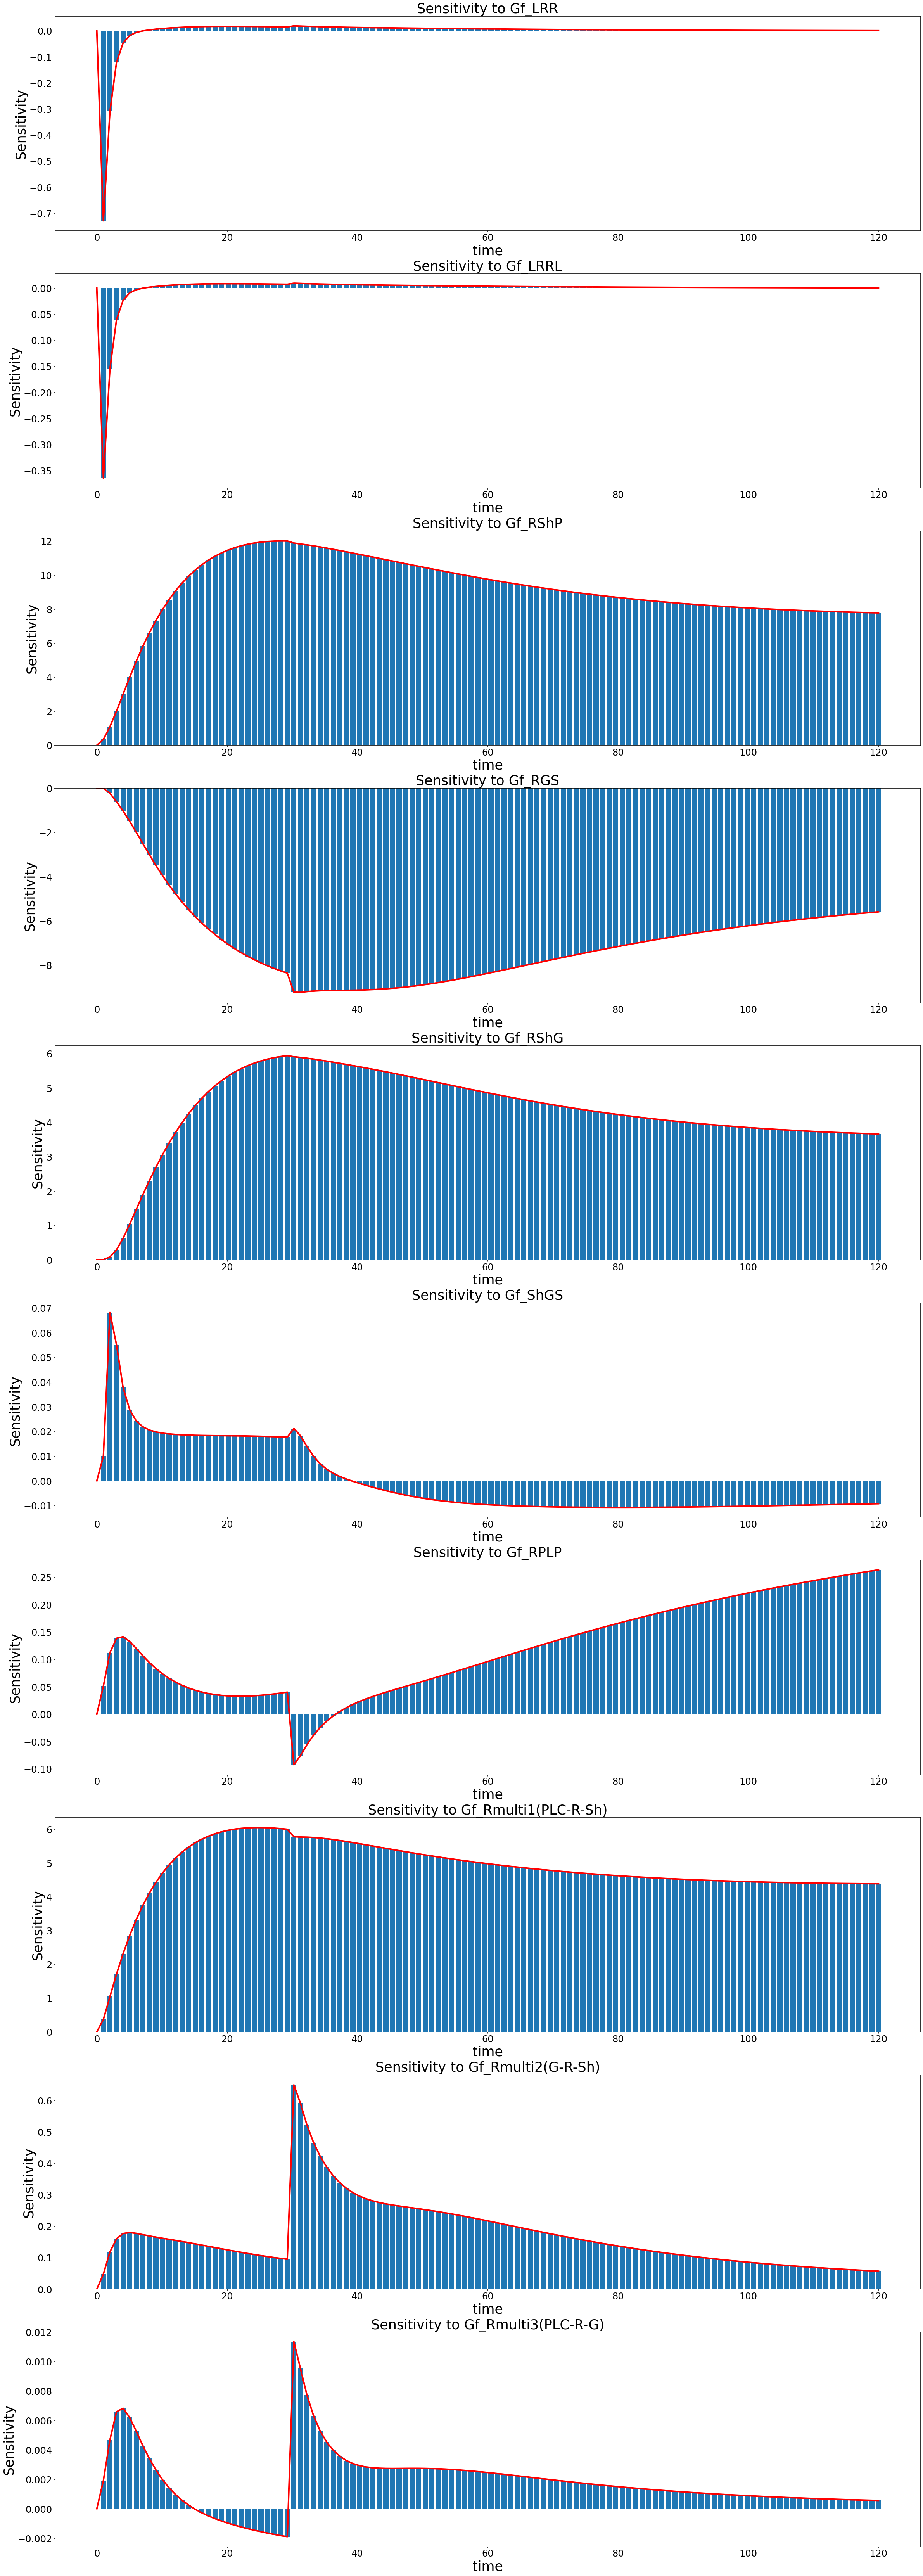

In [10]:
v1 =  [0] * timepoints
v2 =  [0] * timepoints
v3 =  [0] * timepoints
v4 =  [0] * timepoints
v5 =  [0] * timepoints
v6 =  [0] * timepoints
v7 =  [0] * timepoints
v8 =  [0] * timepoints
v9 =  [0] * timepoints
v10 = [0] * timepoints

t = np.linspace(0, timepoints,timepoints)
for i in range(timepoints):
  v1[i]  = P1[i][0]
  v2[i]  = P2[i][0]
  v3[i]  = P3[i][0]
  v4[i]  = P4[i][0]
  v5[i]  = P5[i][0]
  v6[i]  = P6[i][0]
  v7[i]  = P7[i][0]
  v8[i]  = P8[i][0]
  v9[i]  = P9[i][0]
  v10[i] = P10[i][0]

# Plotting the Sensitivity indices for Cooperative free energy parameters with respect tp time
import matplotlib 
matplotlib.rc('xtick', labelsize=24) 
matplotlib.rc('ytick', labelsize=24) 


fig, axes = plt.subplots(10,1, figsize=(40,120))

axes[0].plot(t, v1, 'r-', linewidth=4) 
axes[0].set_ylabel('Sensitivity', fontsize=35)
axes[0].set_xlabel('time', fontsize=35)
axes[0].set_title('Sensitivity to Gf_LRR', fontsize=35)
axes[0].bar(t,v1)

axes[1].plot(t, v2, 'r-', linewidth=4) 
axes[1].set_ylabel('Sensitivity', fontsize=35)
axes[1].set_xlabel('time', fontsize=35)
axes[1].set_title('Sensitivity to Gf_LRRL', fontsize=35)
axes[1].bar(t,v2)

axes[2].plot(t, v3, 'r-', linewidth=4) 
axes[2].set_ylabel('Sensitivity', fontsize=35)
axes[2].set_xlabel('time', fontsize=35)
axes[2].set_title('Sensitivity to Gf_RShP', fontsize=35)
axes[2].bar(t,v3)

axes[3].plot(t, v4, 'r-', linewidth=4) 
axes[3].set_ylabel('Sensitivity', fontsize=35)
axes[3].set_xlabel('time', fontsize=35)
axes[3].set_title('Sensitivity to Gf_RGS', fontsize=35)
axes[3].bar(t,v4)

axes[4].plot(t, v5, 'r-', linewidth=4) 
axes[4].set_ylabel('Sensitivity', fontsize=35)
axes[4].set_xlabel('time', fontsize=35)
axes[4].set_title('Sensitivity to Gf_RShG', fontsize=35)
axes[4].bar(t,v5)

axes[5].plot(t, v6, 'r-', linewidth=4) 
axes[5].set_ylabel('Sensitivity', fontsize=35)
axes[5].set_xlabel('time', fontsize=35)
axes[5].set_title('Sensitivity to Gf_ShGS', fontsize=35)
axes[5].bar(t,v6)

axes[6].plot(t, v7, 'r-', linewidth=4) 
axes[6].set_ylabel('Sensitivity', fontsize=35)
axes[6].set_xlabel('time', fontsize=35)
axes[6].set_title('Sensitivity to Gf_RPLP', fontsize=35)
axes[6].bar(t,v7)

axes[7].plot(t, v8, 'r-', linewidth=4) 
axes[7].set_ylabel('Sensitivity', fontsize=35)
axes[7].set_xlabel('time', fontsize=35)
axes[7].set_title('Sensitivity to Gf_Rmulti1(PLC-R-Sh)', fontsize=35)
axes[7].bar(t,v8)

axes[8].plot(t, v9, 'r-', linewidth=4) 
axes[8].set_ylabel('Sensitivity', fontsize=35)
axes[8].set_xlabel('time', fontsize=35)
axes[8].set_title('Sensitivity to Gf_Rmulti2(G-R-Sh)', fontsize=35)
axes[8].bar(t,v9)

axes[9].plot(t, v10, 'r', linewidth=4) 
axes[9].set_ylabel('Sensitivity', fontsize=35)
axes[9].set_xlabel('time', fontsize=35)
axes[9].set_title('Sensitivity to Gf_Rmulti3(PLC-R-G)', fontsize=35)
axes[9].bar(t,v10)

# Plotting the mean value for Sensitivity Indices

Text(0.5, 1.0, ' Sensitivity Analysis for effect of Cooperative Energy Parameters on EGFR-P')

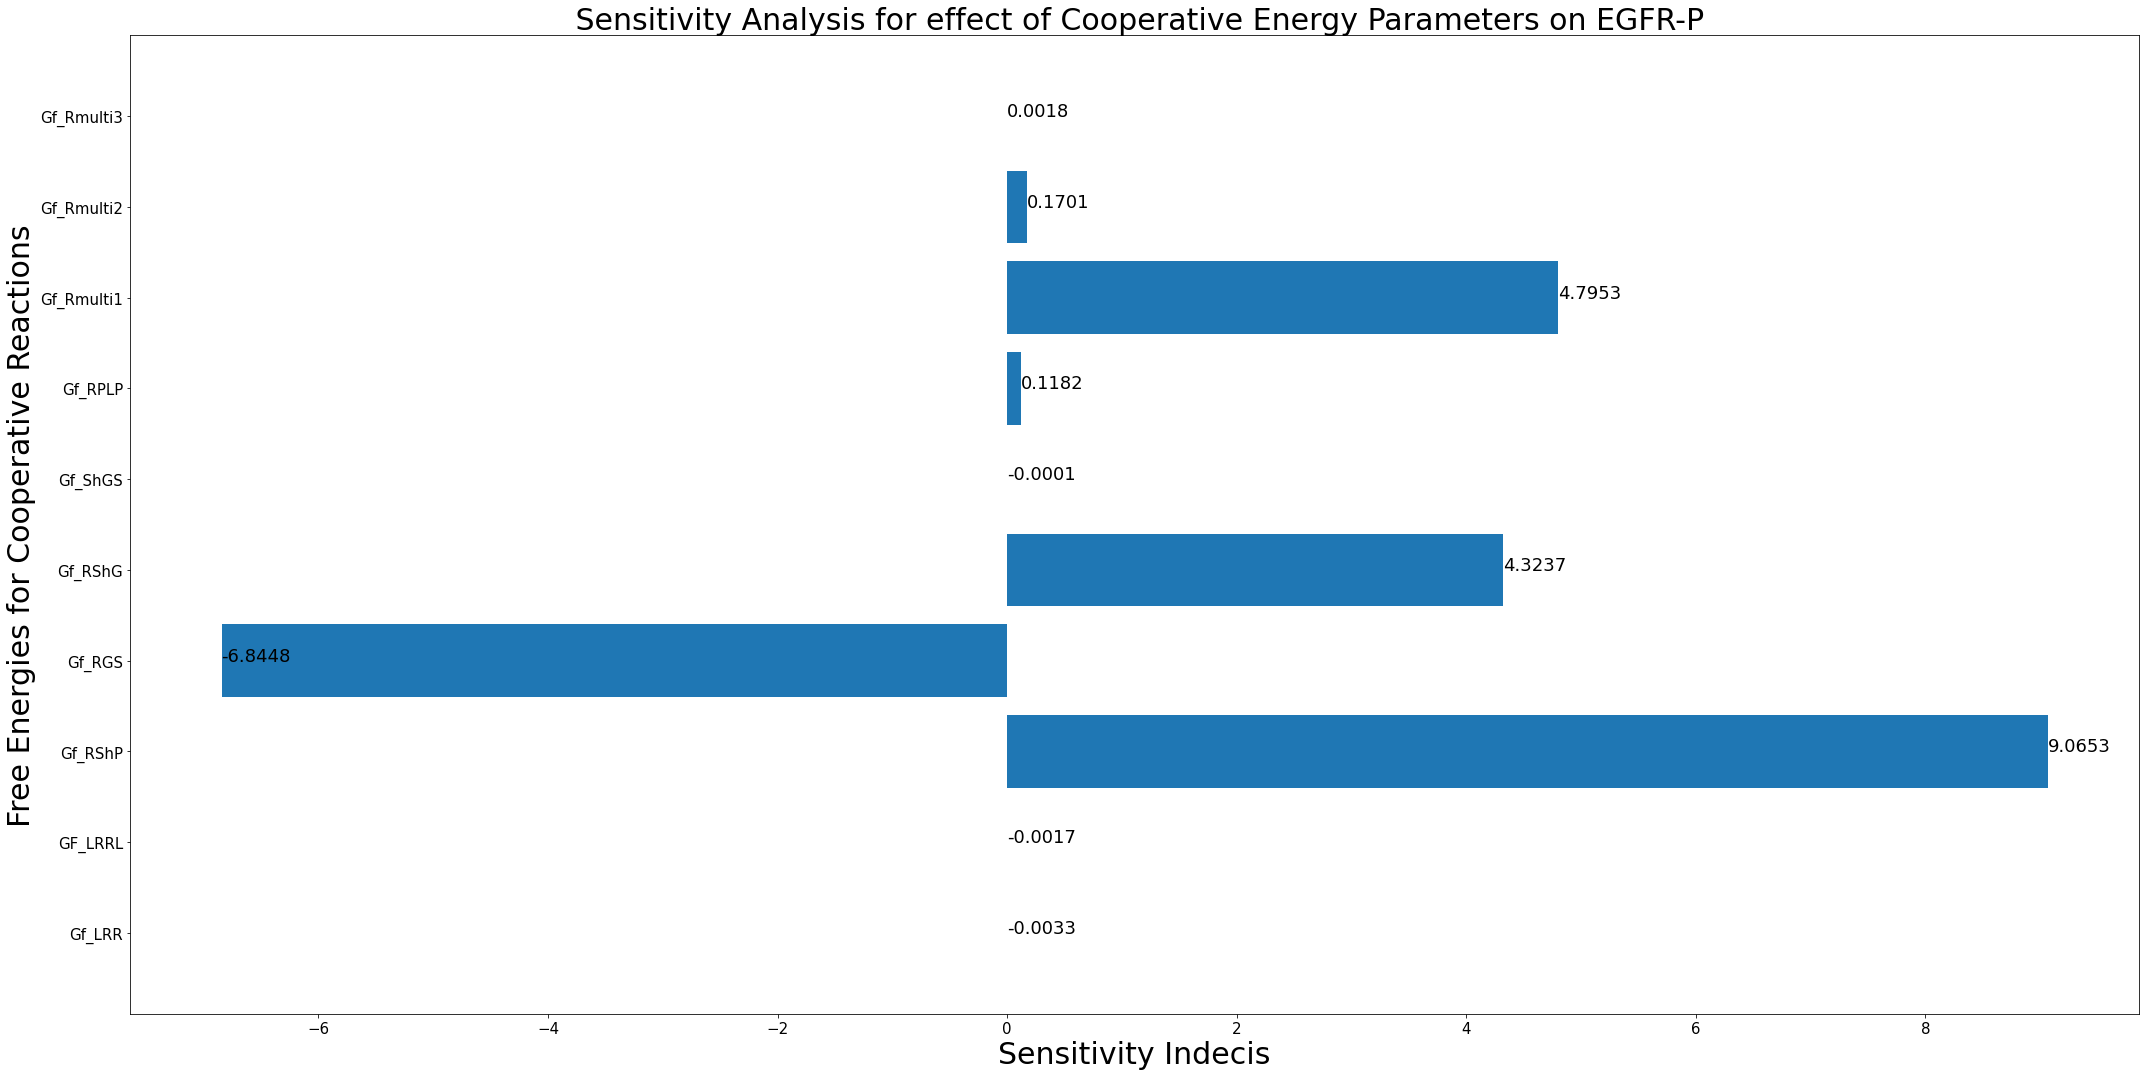

In [12]:
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
plt.rcParams.update({'font.size': 18})
S_Gf_LRR     = mean_Param1[0]
S_Gf_LRRL    = mean_Param2[0]
S_Gf_RShP    = mean_Param3[0]
S_Gf_RGS     = mean_Param4[0]
S_Gf_RShG    = mean_Param5[0]
S_Gf_ShGS    = mean_Param6[0]
S_Gf_RPLP    = mean_Param7[0]
S_Gf_Rmulti1 = mean_Param8[0]
S_Gf_Rmulti2 = mean_Param9[0]
S_Gf_Rmulti3 = mean_Param10[0]
left_coordinates=[1,2,3,4,5,6,7,8,9,10]

heights = [S_Gf_LRR, S_Gf_LRRL, S_Gf_RShP, S_Gf_RGS ,S_Gf_RShG, S_Gf_ShGS, S_Gf_RPLP,S_Gf_Rmulti1,S_Gf_Rmulti2, S_Gf_Rmulti3]
bar_labels = ["Gf_LRR", "GF_LRRL", "Gf_RShP", "Gf_RGS", "Gf_RShG", "Gf_ShGS", "Gf_RPLP", "Gf_Rmulti1", "Gf_Rmulti2", "Gf_Rmulti3"]
y1 = bar_labels
x1 = heights
plt.figure(figsize=(36,18))
plt.barh(bar_labels, heights)
 
for index, value in enumerate(heights):
    plt.text(value, index,
             str(round(value,4 ))) 
plt.ylabel('Free Energies for Cooperative Reactions',fontsize=30)
plt.xlabel('Sensitivity Indecis',fontsize=30)
plt.title(" Sensitivity Analysis for effect of Cooperative Energy Parameters on EGFR-P",fontsize=30)
